In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Use a better style for Matplotlib plots
plt.style.use('seaborn-v0_8-darkgrid') 

# --- 1. Define the General System of ODEs ---
def general_love_system(state, t, a, b, c, d):
    """
    General linear system for the dynamics of love affairs:
    dR/dt = a*R + b*J  (Romeo's rate of change)
    dJ/dt = c*R + d*J  (Juliet's rate of change)

    Args:
        state (list): [R, J], Romeo's and Juliet's love/hate levels.
        t (float): Time (used by odeint).
        a, b, c, d (float): The romantic style parameters.
    
    Returns:
        list: [dR/dt, dJ/dt]
    """
    R, J = state
    
    dRdt = a * R + b * J
    dJdt = c * R + d * J
    
    return [dRdt, dJdt]

In [2]:
def plot_phase_portrait(a, b, c, d, title, R_max=5, t_end=15):
    """
    Generates and plots the phase portrait for the given system.
    """
    
    # 2.1 Calculate Eigenvalues and Determine Stability
    A = np.array([[a, b], [c, d]])
    eigenvals, _ = np.linalg.eig(A)
    
    # Determine type of fixed point (for the plot title)
    stability_type = "Center (Stable Cycle)"
    if np.all(np.real(eigenvals) < 0):
        stability_type = "Stable Node / Focus (Mutual Apathy)"
    elif np.all(np.real(eigenvals) > 0):
        stability_type = "Unstable Node / Focus (Emotional Escalation)"
    elif np.any(np.real(eigenvals) > 0) and np.any(np.real(eigenvals) < 0):
        stability_type = "Saddle Point (Unstable, Fate Depends on Initial State)"
    elif np.any(np.real(eigenvals) == 0) and np.any(np.imag(eigenvals) != 0):
        stability_type = "Center (Non-isolated cycles)" # Handles the specific case from the book
        
    print(f"System Matrix A:\n{A}")
    print(f"Eigenvalues: {eigenvals}")
    
    # 2.2 Setup the phase plane grid (R, J)
    R_values = np.linspace(-R_max, R_max, 30)
    J_values = np.linspace(-R_max, R_max, 30)
    R_grid, J_grid = np.meshgrid(R_values, J_values)
    
    # Calculate the vector field (dR/dt, dJ/dt) at each grid point
    dRd_t = a * R_grid + b * J_grid
    dJd_t = c * R_grid + d * J_grid
    
    # Normalize the vectors for cleaner visualization
    M = np.hypot(dRd_t, dJd_t)
    M[M==0] = 1.0 # Avoid division by zero at the origin
    dRd_t_norm = dRd_t / M
    dJd_t_norm = dJd_t / M

    plt.figure(figsize=(10, 10))
    
    # Plot the vector field (Quiver plot)
    plt.quiver(R_grid, J_grid, dRd_t_norm, dJd_t_norm, M, 
               cmap='viridis', pivot='mid', headlength=4, alpha=0.7)

    # 2.3 Plot several trajectories 
    t = np.linspace(0, t_end, 500) # Time vector for integration
    params = (a, b, c, d)
    
    # Initial conditions (starting points in the R-J plane)
    initial_conditions = [
        [1, 1], [-1, -1], [R_max-1, R_max-1], [R_max-1, 1], 
        [1, -R_max+1], [-R_max+1, 1], [-1, -4]
    ]
    
    for R0, J0 in initial_conditions:
        # Solve the ODE for this starting point
        sol = odeint(general_love_system, [R0, J0], t, args=params)
        # Plot the trajectory
        plt.plot(sol[:, 0], sol[:, 1], 'k-', alpha=0.5, linewidth=1.5)
        
    # 2.4 Aesthetics
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.xlabel("Romeo's Love (R)")
    plt.ylabel("Juliet's Love (J)")
    
    full_title = f"{title}\nOutcome: {stability_type}"
    plt.title(full_title, fontsize=14)
    plt.xlim(-R_max, R_max)
    plt.ylim(-R_max, R_max)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

#

System Matrix A:
[[ 0.  2.]
 [-2.  0.]]
Eigenvalues: [0.+2.j 0.-2.j]


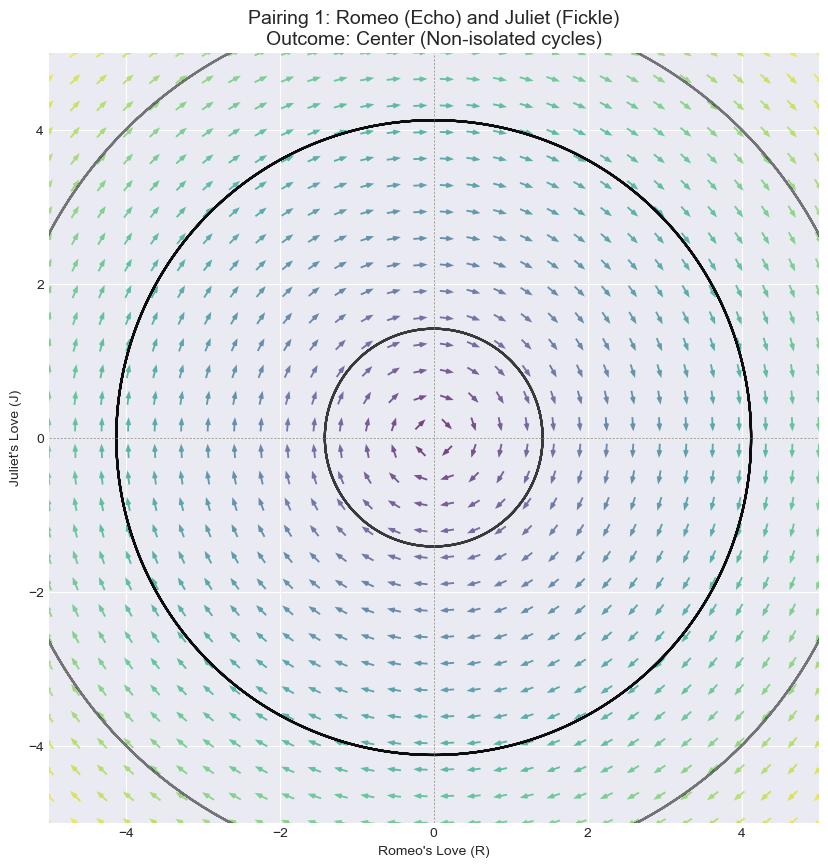

In [3]:
# System: R' = 0*R + 2*J ; J' = -2*R + 0*J
# Outcome: Center (Never-ending cycle of love and hate)

# Parameters
a, b = 0.0, 2.0  # Romeo (Echo): No self-response, responsive to Juliet
c, d = -2.0, 0.0 # Juliet (Fickle): Pulls back when Romeo loves, no self-response

plot_phase_portrait(a, b, c, d, "Pairing 1: Romeo (Echo) and Juliet (Fickle)")

System Matrix A:
[[-0.5  2. ]
 [ 2.  -0.5]]
Eigenvalues: [ 1.5 -2.5]


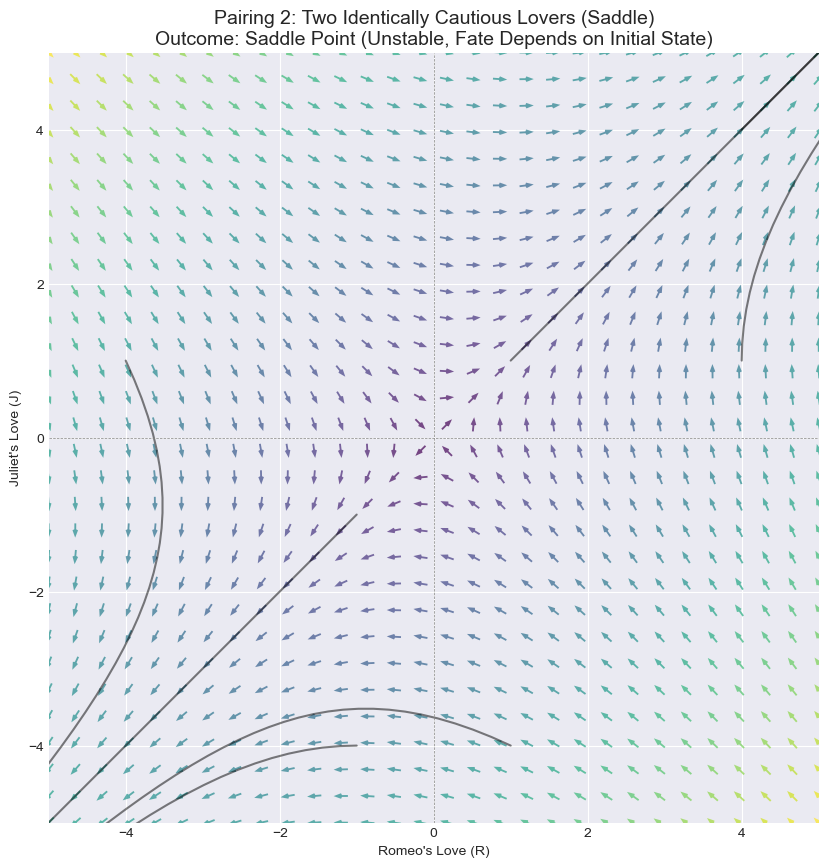

In [4]:
# System: R' = -0.5*R + 2*J ; J' = 2*R + -0.5*J
# Outcome: Saddle Point (Highly unstable, leads to extreme love or hate)

# Parameters (Cautiousness < Responsiveness)
a, b = -0.5, 2.0 # Romeo: Cautious self-response, Positive partner-response
c, d = 2.0, -0.5 # Juliet: Positive partner-response, Cautious self-response

plot_phase_portrait(a, b, c, d, "Pairing 2: Two Identically Cautious Lovers (Saddle)")